In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random_systems import rwalk, coeficiente_D


# Exemplo 7.1

https://mathworld.wolfram.com/RandomWalk1-Dimensional.html

# Exercício 1

In [2]:
m_1 = 100000
n_1 = 100
x_1, x2ave_1 = rwalk(m=m_1, n=n_1)


In [3]:
D_1 = coeficiente_D(x2ave_1)
print(D_1)


0.50313+/-0.00034


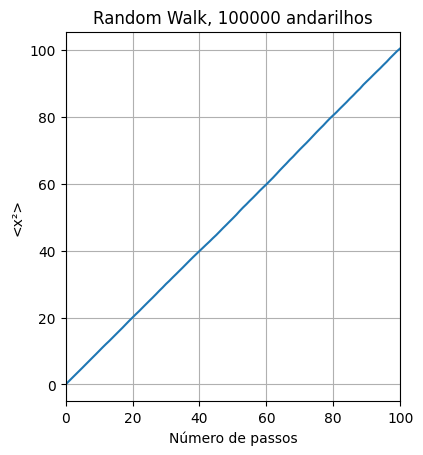

In [4]:
fig_1, ax_1 = plt.subplots()
ax_1.set_title('Random Walk, ' + str(m_1) + ' andarilhos')
ax_1.set_xlabel('Número de passos')
ax_1.set_ylabel('<x²>')
ax_1.set_aspect('equal')
ax_1.grid()
ax_1.set_xlim(0, n_1)
ax_1.plot(x2ave_1)


# Exercício 2

In [5]:
m_2 = 100000
n_2 = 100
p_2 = 0.25
x_2, x2ave_2 = rwalk(p_esq=p_2, m=m_2, n=n_2)


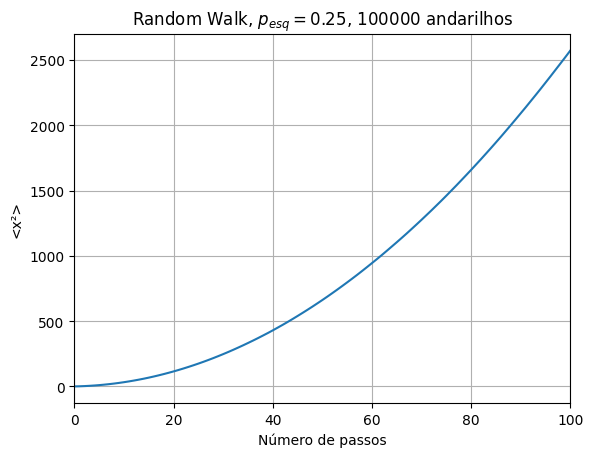

In [ ]:
fig_2, ax_2 = plt.subplots()
ax_2.set_title('Random Walk, ' +
               '$p_{esq} = 0.25$, ' + str(m_2) + ' andarilhos')
ax_2.set_xlabel('Número de passos')
ax_2.set_ylabel('<x²>')
# ax_2.set_aspect('equal')
ax_2.grid()
ax_2.set_xlim(0, n_2)
ax_2.plot(x2ave_2)


# Exercício 3

# Exercício 4

## 4. a)

## 4. b)

## 4. c)

# Exercício 5

# Salvar imagens

In [ ]:
# fig_1.savefig(fname='lista03/' + 'fig_1.pdf')

# fig_2.savefig(fname='lista03/' + 'fig_2.pdf')
